# 深度神经网络与非线形回归

# 原来的回归问题

$$\hat{y} = \beta_0 + x_1\beta_1 + \cdots + x_p\beta_p$$

# 神经网络加了一个非线形变换

$$\hat{y} = f(\beta_0 + x_1\beta_1 + \cdots + x_p\beta_p)$$

## 非线形变换的特点
    * 一元
    
    * 可能有不可导点
    
    * 有一些单调性

<img src="./sources/activation.png" alt="drawing" width="800"/>

## 猜猜那个最好用？

# 只做一个非线形变换没什么了不起

$$\hat{y}^{(1)} = f^{(1)}(\beta_{10} + x_1\beta_{11} + \cdots + x_p\beta_{1p})$$

$$\hat{y}^{(2)} = f^{(2)}(\beta_{20} + x_1\beta_{21} + \cdots + x_p\beta_{2p})$$

$$\hat{y}^{(k)} = f^{(k)}(\beta_{k0} + x_1\beta_{k1} + \cdots + x_p\beta_{kp})$$

# 做k次变换

我们把输入

$$x = (x_1, \cdots, x_p)$$

变成了

$$x = (\hat{y}^{(1)}, \cdots, \hat{y}^{(k)})$$



$$\hat{y}^{(1)} = f^{(1}(\beta_{10} + x_1\beta_{11} + \cdots + x_p\beta_{1p})$$

$$\hat{y}^{(2)} = f^{(2}(\beta_{20} + x_1\beta_{21} + \cdots + x_p\beta_{2p})$$

$$\hat{y}^{(k)} = f^{(k}(\beta_{k0} + x_1\beta_{k1} + \cdots + x_p\beta_{kp})$$

# 变换的特点

    * 带参数

    * 可以任意多组

    * 还有什么



# 反复迭代上面的过程

<img src="./sources/network.jpg" alt="drawing" width="600"/>

# 总结（重要）

深度神经网络就是把输入$$x = (x_1, \cdots, x_p)$$做了带参数的非线形变换变成$$x = (\hat{y}^{(1)}, \cdots, \hat{y}^{(k)})$$.

然后该做线性回归做线性回归，该做逻辑回归做逻辑回归。

In [1]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

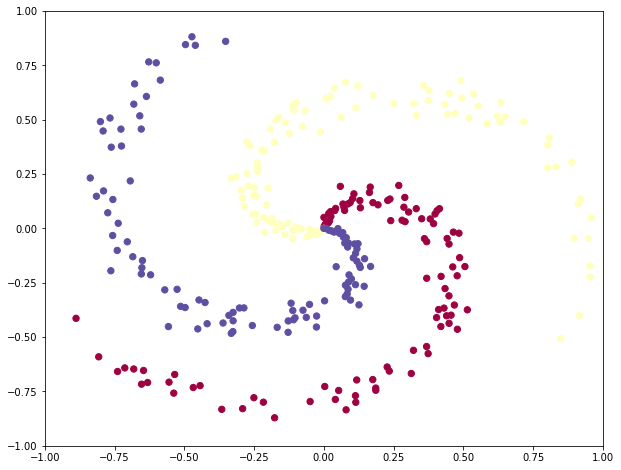

In [3]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
fig.savefig('./sources/spiral_raw.png')

# 一个例子

螺旋曲线$(rsin(t), rcos(t))$

<img src="./sources/spiral_raw.png" alt="drawing" width="600"/>

做回归$$\hat{y}=f(x_1, x_2)$$

In [6]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):
  
  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b 
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  
  dW += reg*W # regularization gradient
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.100624
iteration 10: loss 0.918448
iteration 20: loss 0.851978
iteration 30: loss 0.822560
iteration 40: loss 0.807703
iteration 50: loss 0.799514
iteration 60: loss 0.794720
iteration 70: loss 0.791788
iteration 80: loss 0.789936
iteration 90: loss 0.788736
iteration 100: loss 0.787944
iteration 110: loss 0.787413
iteration 120: loss 0.787052
iteration 130: loss 0.786805
iteration 140: loss 0.786634
iteration 150: loss 0.786515
iteration 160: loss 0.786432
iteration 170: loss 0.786373
iteration 180: loss 0.786332
iteration 190: loss 0.786302


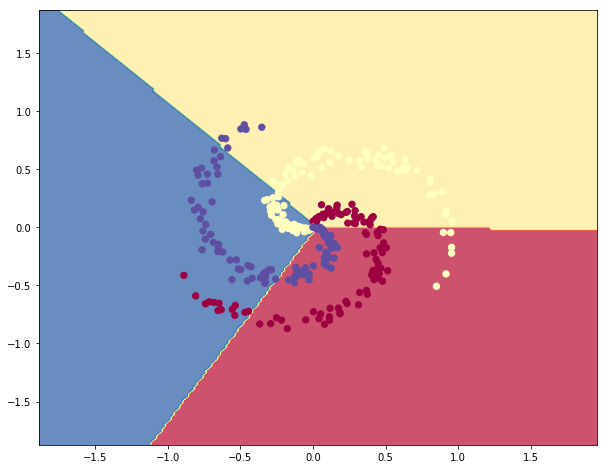

In [7]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
fig.savefig('./sources/spiral_linear.png')


## 预测平面上的每一个点，并涂上颜色
<img src="./sources/spiral_linear.png" alt="drawing" width="700"/>

In [10]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):
  
  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)
  
  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 1.098763
iteration 1000: loss 0.294573
iteration 2000: loss 0.251363
iteration 3000: loss 0.246329
iteration 4000: loss 0.245198
iteration 5000: loss 0.244931
iteration 6000: loss 0.244857
iteration 7000: loss 0.244798
iteration 8000: loss 0.244754
iteration 9000: loss 0.244710


# 神经网络

    * 2 层 (中间1层隐藏层，然后做回归（也叫输出层）)
    
    * relu
    
    * k = 100, N = 300
    
    * 大概多少个参数？

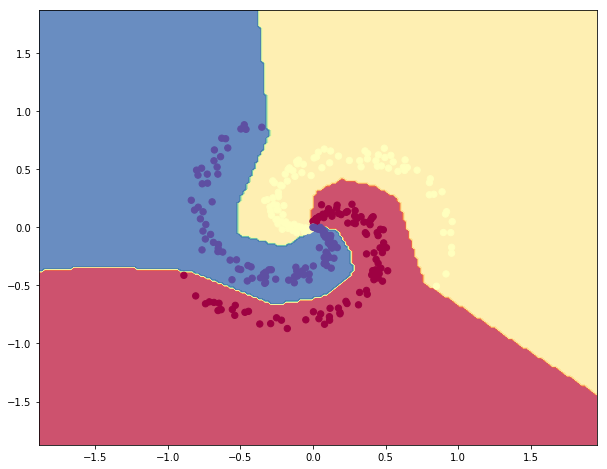

In [13]:

# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
fig.savefig('./sources/spiral_net.png')

# 预测

<img src="./sources/spiral_net.png" alt="drawing" width="700"/>

# 总结


<img src="./sources/neuron_model.jpeg" alt="drawing" width="500"/>

# 总结

<img src="./sources/neural_net2.jpeg" alt="drawing" width="500"/>